In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
from sklearn import datasets
import pandas as pd
import numpy as np

dataset = pd.DataFrame(datasets.load_iris().data)
label = datasets.load_iris().target
X = dataset.head(100).values

In [24]:
y = label[:100]

In [25]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X,y)
pred = clf.predict(X)
print (pred == y).sum()

100


In [26]:
from sklearn.cross_validation import KFold

print kf

sklearn.cross_validation.KFold(n=100, n_folds=10, shuffle=True, random_state=None)


In [96]:
def myPlot(X,y):
    X1 = X[y==1]
    X2 = X[y!=1]
    plt.plot(X1[:,0],X1[:,1],'x')
    plt.plot(X2[:,0],X2[:,1],'o')
    plt.show()

In [200]:
from sklearn.svm import SVC
def crossValidation(X,y):
    myPlot(X,y)
    kf = KFold(X.shape[0], n_folds=10,shuffle=True)
#     clf = SVC(kernel='rbf',C=100)
    clf = GaussianNB()
    ans = np.zeros(10)
    i = 0
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train,y_train)
        pred = clf.predict(X_test)
        ans[i] = ((pred == y_test).sum()*1.0)/pred.shape[0]
        i += 1
    print "accuracy is:",ans.mean()
    return ans

In [55]:
cv = crossValidation(X,Y,LinearSVC)

accuracy is: 1.0


In [71]:
dataset = datasets.load_digits().data
label = datasets.load_digits().target
mask0 = (label==0)
mask1 = (label==1)
label = label[mask1+mask0]
dataset = dataset[mask0+mask1]
cv = crossValidation(dataset,label,LinearSVC)

accuracy is: 1.0


TypeError: load_mlcomp() takes at least 1 argument (0 given)

In [37]:
k = np.array

In [38]:
k

array(10)

In [39]:
k[0]

IndexError: too many indices for array

In [84]:
glass = pd.read_csv('data/glass.data',header=None)
glass = pd.concat([glass[glass[10]==1],glass[glass[10]==2]])
glass.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1


In [201]:
y = glass[10].values
X = glass.drop([10,0],axis=1).values

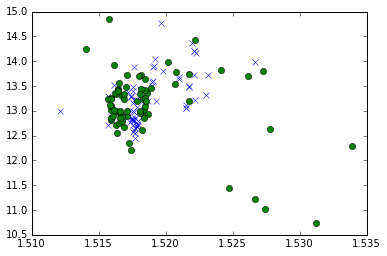

accuracy is: 0.602380952381


array([ 0.66666667,  0.46666667,  0.73333333,  0.73333333,  0.6       ,
        0.46666667,  0.64285714,  0.64285714,  0.57142857,  0.5       ])

In [202]:
crossValidation(X,y)

0.520547945205


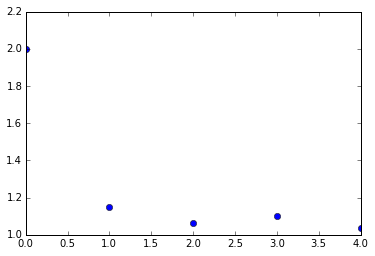

In [118]:
from scipy import sparse
numFeatures = X.shape[1]
numData = X.shape[0]
numNodes = numData + numFeatures + 2

A = sparse.lil_matrix((numNodes,numNodes))

# features: 0-numFeatures
# data: numFeature-(numFeature+numData)
# label: (numFeature+numData), (numFeature+numData+1)
# connect datas to features
for i in range(numData):
    for j in range(numFeatures):
        A[i+numFeatures,j] = X[i,j]
        A[j,i+numFeatures] = X[i,j]

# connect datas to labels
for i in xrange(numData):
    if y[i] == 1:
        A[numData+numFeatures,numFeatures+i] = 1
        A[numFeatures+i,numData+numFeatures] = 1
    else:
        A[numData+numFeatures+1,numFeatures+i] = 1
        A[numFeatures+i,numData+numFeatures+1] = 1

#construct D
N = A.shape[0]
D = sparse.lil_matrix((N,N))
a = A.sum(axis=0)
for i in range(N):
    D[i,i] = a[0,i]
L = D-A
for i in range(numNodes):
    if D[i,i] >-0.0001 and D[i,i] < 0.0001:
        print i, D[i,i]
# generalized eigenvalue decomposition  Lv = tDv
vals, newDataRepresent = sparse.linalg.eigs(L, k=5, M=D)
dataset = pd.DataFrame(newDataRepresent[numFeatures:numFeatures+numData].real)

X1 = dataset[y== 1]
X2 = dataset[y== 2]


Y = pd.Series(y)

Xtrain = pd.concat([X1,X2])
Y1 = Y[Y==1]
Y2 = Y[Y==2]
Ytrain = pd.concat([Y1,Y2])




In [119]:
Xtrain.head()

,0,1,2,3,4
0,-0.005783,-0.001537,0.000813,-0.006609,-0.006797
1,-0.005783,-0.001392,0.002028,-0.005953,-0.002474
2,-0.005783,-0.001349,0.001932,-0.005879,-0.002377
3,-0.005783,-0.001353,0.001688,-0.005956,-0.001702
4,-0.005783,-0.001364,0.001630,-0.005954,-0.001890


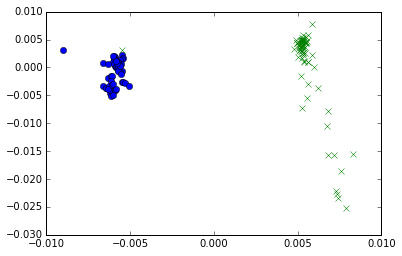

In [138]:
plt.plot(X1[3],X1[2],'o')
plt.plot(X2[3],X2[2],'x')
# print Y1
# print Y2

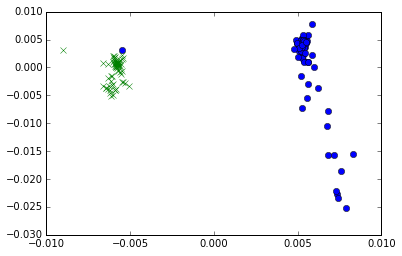

In [131]:
plt.plot(X2[3],X2[2],'o')
plt.plot(X1[3],X1[2],'x')


In [203]:
from sklearn import svm
clf2 = svm.LinearSVC(C=100)
Xt = pd.concat([X1,X2]).values
yt = pd.concat([Y1,Y2]).values
print "yt",yt
clf2.fit(Xt[:,[2,3]],yt)
Ypred = clf2.predict(Xt[:,[2,3]])
print ((Ypred==yt).sum()*1.0)/len(Ypred)
print Ypred

yt [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
0.993150684932
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


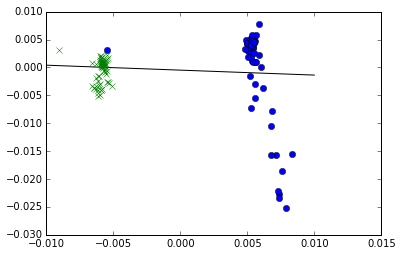

In [204]:

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-.01, .01)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy + a * margin
yy_up = yy - a * margin

# plot the line, the points, and the nearest vectors to the plane
# plt.figure(fignum, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
# plt.plot(xx, yy_down, 'k--')
# plt.plot(xx, yy_up, 'k--')
plt.plot(X2[3],X2[2],'o')
plt.plot(X1[3],X1[2],'x')
plt.show()

In [154]:
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()
clf3.fit(Xt,yt)
Ypred = clf3.predict(Xt)
print ((Ypred==yt).sum()*1.0)/len(Ypred)
print Ypred

0.993150684932
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


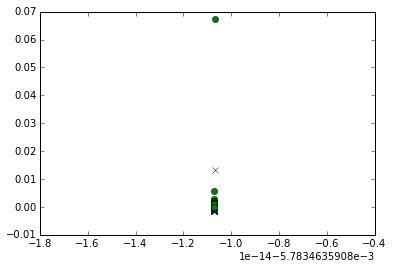

accuracy is: 0.521904761905


array([ 0.6       ,  0.46666667,  0.4       ,  0.6       ,  0.46666667,
        0.4       ,  0.57142857,  0.64285714,  0.57142857,  0.5       ])

In [185]:
crossValidation(Xt,yt)

Automatically created module for IPython interactive environment


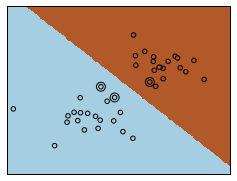

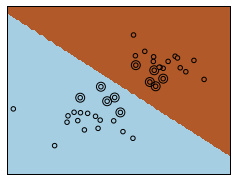

In [167]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

Automatically created module for IPython interactive environment


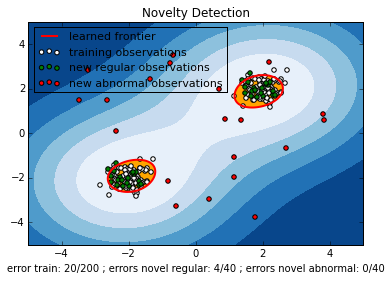

In [208]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()